In [5]:
import datetime
import pandas as pd
import os
import sys
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
from joypy import joyplot
import yfinance as yf

os.chdir('/content/drive/Othercomputers/My MacBook Air/Taxes_and_other_forms/lifecycle_investing')

In [3]:
!pip install joypy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import lc_investing.birthday_rule
lc_investing.birthday_rule = reload(lc_investing.birthday_rule)

s1 = lc_investing.birthday_rule.Simulation()
s1.retirement_savings_before_period.head(2)
s1.retirement_savings_before_period.Final.describe()

count    9.600000e+01
mean     6.465746e+05
std      1.686988e+05
min      2.903095e+05
25%      5.393432e+05
50%      6.415549e+05
75%      7.790438e+05
max      1.026903e+06
Name: Final, dtype: float64

In [ ]:
import lc_investing.constant_percent_stock
lc_investing.constant_percent_stock = reload(lc_investing.constant_percent_stock)

s2 = lc_investing.constant_percent_stock.Simulation()
s2.retirement_savings_before_period.head(2)
s2.retirement_savings_before_period.Final.describe()

count    9.600000e+01
mean     7.488387e+05
std      2.498310e+05
min      3.087257e+05
25%      5.610321e+05
50%      6.914265e+05
75%      9.220283e+05
max      1.252684e+06
Name: Final, dtype: float64

In [ ]:
import lc_investing.lifecycle_strategy
lc_investing.lifecycle_strategy = reload(lc_investing.lifecycle_strategy)

s3 = lc_investing.lifecycle_strategy.Simulation()
s3.calc_retirement_savings_before_period()
s3.retirement_savings_before_period.FINAL.describe()

count    9.600000e+01
mean     1.223105e+06
std      4.533787e+05
min      3.871724e+05
25%      8.841381e+05
50%      1.146812e+06
75%      1.522653e+06
max      2.177424e+06
Name: FINAL, dtype: float64

,cohort_num,FINAL,emile
13,14,1006486.347,1.006486e+06
14,15,1362866.777,1.362867e+06


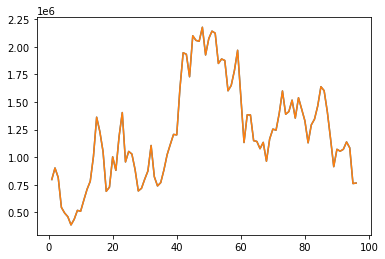

In [ ]:
# lifecycle_retirement_savings_before_period, FINAL

df1 = pd.read_csv('/content/drive/Othercomputers/My MacBook Air/Taxes_and_other_forms/lifecycle_investing/lc_investing/data/lifecycle_retirement_savings_before_period.csv')

df2 = df1.loc[:, ['cohort_num','FINAL']]
df2.loc[:, 'emile'] = s.retirement_savings_before_period.FINAL

# df2 = df2.iloc[12:58, :]

plt.plot(df2.cohort_num, df2.FINAL)
plt.plot(df2.cohort_num, df2.emile)

df2.iloc[13:15]

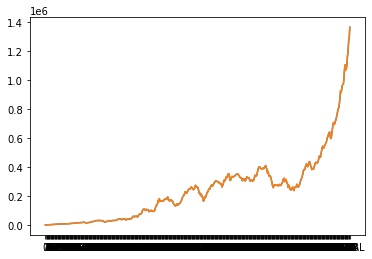

,cohort_num,begins_work,retire,period_num,actual,emile
0,15,1885,1928,0,0.000000,0.000000
1,15,1885,1928,1,157.453664,157.453664
2,15,1885,1928,2,333.819247,333.819247
3,15,1885,1928,3,510.095955,510.095954
4,15,1885,1928,4,663.659038,663.659037


In [ ]:
import matplotlib.pyplot as plt

# lifecycle_retirement_savings_before_period
df1 = pd.read_csv('/content/drive/Othercomputers/My MacBook Air/Taxes_and_other_forms/lifecycle_investing/lc_investing/data/lifecycle_retirement_savings_before_period.csv')

cohort_num=15

df2 = pd.melt(df1.loc[df1.cohort_num==cohort_num], 
              id_vars=['cohort_num', 'begins_work', 'retire'],
              var_name='period_num',
              value_name='actual')

df2.loc[:, 'emile'] = s.retirement_savings_before_period.loc[s.retirement_savings_before_period.cohort_num==cohort_num, 0:].values.flatten()

# df2 = df2.iloc[516:519,:]

# Plot a simple line chart
plt.plot(df2.period_num, df2.actual)

# Plot another line on the same chart/graph
plt.plot(df2.period_num, df2.emile)

plt.show()
df2.head()

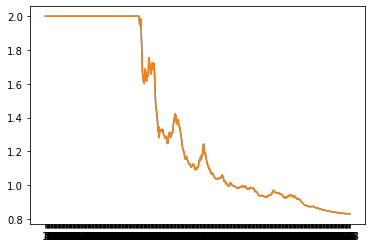

,cohort_num,begins_work,retire,period_num,actual,emile
1,15,1885,1928,1,2.0,2.0
2,15,1885,1928,2,2.0,2.0
3,15,1885,1928,3,2.0,2.0
4,15,1885,1928,4,2.0,2.0
5,15,1885,1928,5,2.0,2.0


In [ ]:
import matplotlib.pyplot as plt

# percentage_target
df3 = pd.read_csv('/content/drive/Othercomputers/My MacBook Air/Taxes_and_other_forms/lifecycle_investing/lc_investing/data/percentage_target.csv')

cohort_num=15

df4 = pd.melt(df3.loc[df1.cohort_num==cohort_num], 
              id_vars=['cohort_num', 'begins_work', 'retire'],
              var_name='period_num',
              value_name='actual')

df4.loc[:, 'emile'] = s.percentage_target.loc[s.percentage_target.cohort_num==cohort_num, 0:].values.flatten()

df4 = df4.iloc[1:, :]

# Plot a simple line chart
plt.plot(df4.period_num, df4.actual)

# Plot another line on the same chart/graph
plt.plot(df4.period_num, df4.emile)

plt.show()
df4.head()

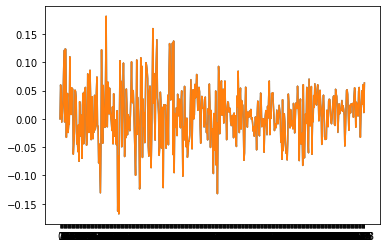

,cohort_num,begins_work,retire,period_num,actual,emile
0,15,1885,1928,0,0.000000,0.000000
1,15,1885,1928,1,0.060056,0.060056
2,15,1885,1928,2,0.038315,0.038315
3,15,1885,1928,3,-0.005828,-0.005828
4,15,1885,1928,4,0.010240,0.010240


In [ ]:
import matplotlib.pyplot as plt

# real_returns
df3 = pd.read_csv('/content/drive/Othercomputers/My MacBook Air/Taxes_and_other_forms/lifecycle_investing/lc_investing/data/real_returns.csv')

cohort_num=15

df4 = pd.melt(df3.loc[df3.cohort_num==cohort_num], 
              id_vars=['cohort_num', 'begins_work', 'retire'],
              var_name='period_num',
              value_name='actual')

df4.loc[:, 'emile'] = s.real_returns.loc[s.real_returns.cohort_num==cohort_num, 0:].values.flatten()

# df4 = df4.iloc[515:518,:]

# Plot a simple line chart
plt.plot(df4.period_num, df4.actual)

# Plot another line on the same chart/graph
plt.plot(df4.period_num, df4.emile)

plt.show()
df4.head()

In [ ]:
s1.retirement_savings_before_period.head(2)

,cohort_num,begins_work,retire,1,2,3,4,5,6,7,...,520,521,522,523,524,525,526,527,528,Final
0,1,1871,1914,157.453664,311.004722,474.210363,675.569397,875.762904,1046.578224,1188.359522,...,645900.979200,642372.681365,644271.637102,622737.714678,613247.231083,615776.607908,624420.796264,620811.100134,615836.189537,623629.924186
1,2,1872,1915,157.453664,317.315176,483.849853,646.298296,807.514840,968.237814,1141.824931,...,620469.850211,609431.481574,614967.969317,616268.098563,632100.686937,646560.221168,660690.760398,667934.029510,672095.056779,662217.704359


In [ ]:
data1 = s1.retirement_savings_before_period. \
  rename(columns={'FINAL': 529, 'Final': 529}). \
  drop(columns=['cohort_num', 'retire']). \
  melt(id_vars = ['begins_work'],
       var_name='period')
data1.loc[:, 'strategy'] = 'birthday_rule'
  
data2 = s2.retirement_savings_before_period. \
  rename(columns={'FINAL': 529, 'Final': 529}). \
  drop(columns=['cohort_num', 'retire']). \
  melt(id_vars = ['begins_work'],
       var_name='period')
data2.loc[:, 'strategy'] = 'constant_percent'

data3 = s3.retirement_savings_before_period. \
  rename(columns={'FINAL': 529, 'Final': 529}). \
  drop(columns=['cohort_num', 'retire']). \
  melt(id_vars = ['begins_work'],
       var_name='period')
data3.loc[:, 'strategy'] = 'lifecycle'

data4 = pd.concat([data1, data2, data3], axis=0)

data4.period = pd.to_numeric(data4.period)
data4.head(2)

,begins_work,period,value,strategy
0,1871,1,157.453664,birthday_rule
1,1872,1,157.453664,birthday_rule


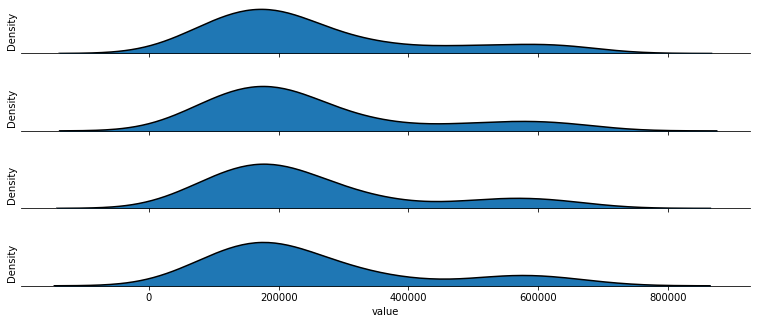

In [ ]:
data5 = data4.loc[(data4.period > 255) & (data4.period <= 259)]

g = sns.FacetGrid(data5, row="period", aspect=9, height=1.2)
# g.map_dataframe(sns.kdeplot, x="value")
g.map_dataframe(sns.kdeplot, x="value", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="value", color='black')

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
# g.map(label, "period")

# g.fig.subplots_adjust(hspace=-.0);
g.set_titles("");
g.set(yticks=[]);
g.despine(left=True);

In [ ]:
data5 = data4.pivot(index=['begins_work', 'period'], 
                    columns='strategy', 
                    values='value'). \
  reset_index()

data5.tail(3)

strategy,begins_work,period,birthday_rule,constant_percent,lifecycle
50877,1966,527,683365.881984,634225.460370,766120.899743
50878,1966,528,683699.215317,634558.793704,766454.233076
50879,1966,529,683699.215317,634558.793704,766454.233076


<Figure size 432x288 with 0 Axes>

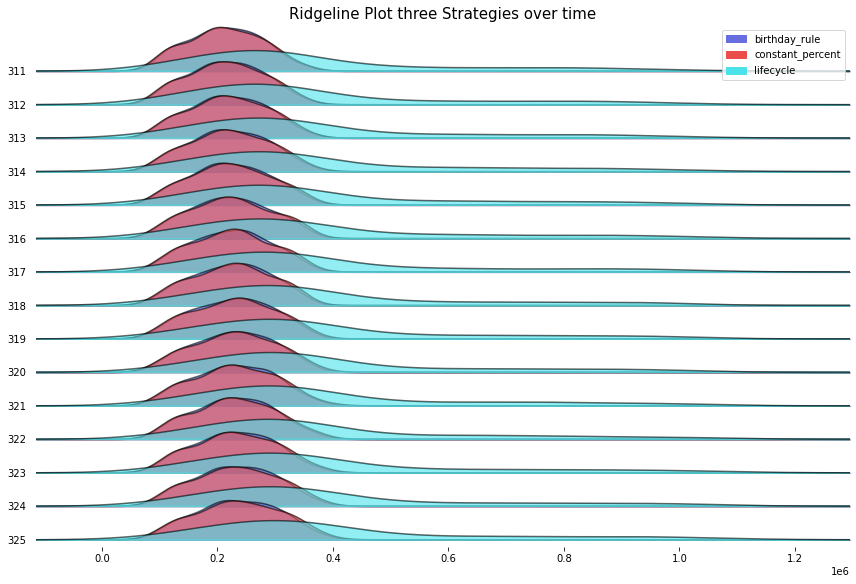

In [ ]:
data6 = data5.loc[(data5.period > 310) & (data5.period <= 325)]

# https://towardsdatascience.com/ridgeline-plots-the-perfect-way-to-visualize-data-distributions-with-python-de99a5493052
plt.figure()

ax, fig = joyplot(
    data=data6, 
    by='period',
    column=['birthday_rule', 'constant_percent', 'lifecycle'],
    color=['#686de0', '#eb4d4b', '#4be3eb'],
    legend=True,
    alpha=0.6,
    figsize=(12, 8)
)
plt.title('Ridgeline Plot three Strategies over time', fontsize=15);
plt.show();

In [ ]:
data6.head(2)

strategy,begins_work,period,birthday_rule,constant_percent,lifecycle
257,1871,257,213163.691384,212724.801408,246219.305989
258,1871,258,213666.586862,213154.007774,246068.059194


In [ ]:
# sanity check - match the paper?
data6.loc[data6.period==529, 'lifecycle'].describe()

count    9.600000e+01
mean     1.223105e+06
std      4.533787e+05
min      3.871724e+05
25%      8.841381e+05
50%      1.146812e+06
75%      1.522653e+06
max      2.177424e+06
Name: lifecycle, dtype: float64

In [ ]:
# percentiles of final returns
data4.loc[data4.period==529].groupby('strategy')['value']. \
  describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5,0.75,0.9,0.95,0.99]).T

strategy,birthday_rule,constant_percent,lifecycle
count,9.600000e+01,9.600000e+01,9.600000e+01
mean,6.465746e+05,7.488387e+05,1.223105e+06
std,1.686988e+05,2.498310e+05,4.533787e+05
min,2.903095e+05,3.087257e+05,3.871724e+05
1%,3.183704e+05,3.559097e+05,4.359099e+05
5%,3.668565e+05,4.011380e+05,5.167926e+05
10%,4.162528e+05,4.492664e+05,7.018344e+05
25%,5.393432e+05,5.610321e+05,8.841381e+05
50%,6.415549e+05,6.914265e+05,1.146812e+06
75%,7.790438e+05,9.220283e+05,1.522653e+06


In [ ]:
# final results, two strategies
data7 = data4.loc[(data4.period==529) & (data4.strategy != 'birthday_rule')].reset_index()
data7.head(2)

,index,begins_work,period,value,strategy
0,50688,1871,529,667170.867592,constant_percent
1,50689,1872,529,743973.367790,constant_percent


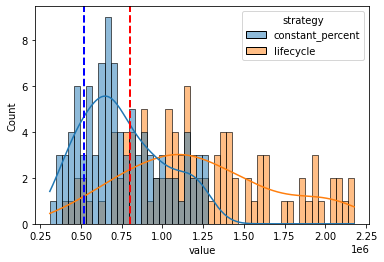

In [ ]:
sns.histplot(data=data7, 
             x="value", 
             hue="strategy",
             bins=50,
             kde=True)

# plt.plot([2.8, 2.8], [0, max(data)])
q=0.2
plt.axvline(x=data7.loc[data7.strategy=='constant_percent'].value.quantile(q=q),
            color='blue',
            ls='--', 
            lw=2.0)

plt.axvline(x=data7.loc[data7.strategy=='lifecycle'].value.quantile(q=q),
            color='red',
            ls='--', 
            lw=2.0)

Ridge Plots in R

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
# python to R
%R -i data4

In [ ]:
%%R
install.packages("ggridges")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpvRCm4y/downloaded_packages’



In [ ]:
%%R
library(ggplot2)
library(ggridges)
theme_set(theme_minimal())
library(magrittr)
library(dplyr)

In [ ]:
%%R
data4 %>% filter(period>= 525) %>% head()

  begins_work period    value      strategy
1        1871    525 615776.6 birthday_rule
2        1872    525 646560.2 birthday_rule
3        1873    525 609078.4 birthday_rule
4        1874    525 456048.3 birthday_rule
5        1875    525 373009.0 birthday_rule
6        1876    525 345704.2 birthday_rule


In [ ]:
%%R
data5 = data4 %>% 
  filter(strategy=='lifecycle') %>%
  filter(period >= 525)

data5$period = as.character(data5$period)
sapply(data5, class)

begins_work      period       value    strategy 
  "integer" "character"   "numeric" "character" 


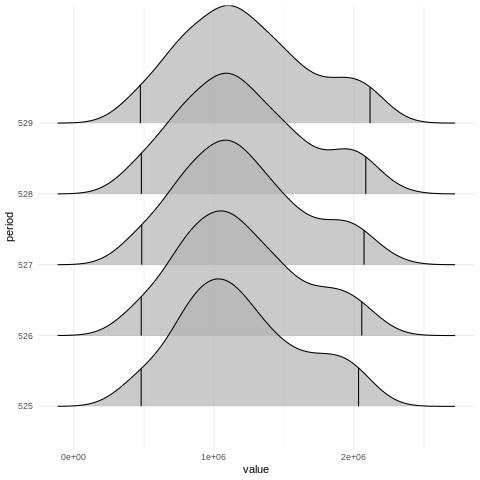

In [ ]:
%%R
# Indicate the 2.5% and 97.5% tails
# https://www.datanovia.com/en/blog/elegant-visualization-of-density-distribution-in-r-using-ridgeline/
# data5 = data4 %>% 
#   filter(strategy=='lifecycle') %>%
#   filter(period >= 525)

ggplot(data5, aes(x = value, y = period)) +
  stat_density_ridges(quantile_lines = TRUE, quantiles = c(0.025, 0.975), alpha = 0.7)

In [ ]:
tickers = yf.Tickers('itot spy')


In [ ]:
import yfinance as yf

tickers = yf.Tickers('itot spy')
# ^ returns a named tuple of Ticker objects

# access each ticker using (example)
# tickers.tickers['ITOT'].info
# tickers.tickers['ITOT'].history(period="1mo")
# tickers.tickers.SPY.actions

# get options dates
option_dates_df = pd.DataFrame(index=pd.to_datetime(tickers.tickers['SPY'].options))

In [ ]:
# date one year ahead
one_year_ahead = pd.Timestamp(datetime.datetime(2021, 10, 10)).today() + pd.offsets.DateOffset(years=1)

# get all options with expiration at least one year in the future
options_farther_one_year = option_dates_df.loc[one_year_ahead:].index


def compute_interest(ticker: str, date: str):
  """Download call options and compute implied interest rate"""

  oc = tickers.tickers[ticker].option_chain(str(date.date())). \
    calls. \
    loc[:, ['contractSymbol', 'strike', 'lastPrice', 'bid', 'ask']]. \
    sort_values(['strike', 'contractSymbol']).copy()

  oc.insert(loc=1, column='expiration', value=date)
  oc.insert(loc=2, column='today', value=pd.Timestamp(year=2022, month=1, day=1).today())
  oc.insert(loc=3, column='days_until_expiration', value = (oc['expiration'] - oc['today']).dt.days)
  oc.insert(loc=5, column='current_price', value=tickers.tickers[ticker].history(period='1d').loc[:, 'Close'].values[0])
  oc.insert(loc=6, column='frac_of_current_price', value=oc['strike'] / oc['current_price'])  
  
  oc.loc[:, 'mid'] = oc['bid'] + (oc['ask'] - oc['bid'])/2
  oc.loc[:, 'implied_amt_borrowed'] = oc['current_price'] - oc['mid']
  oc.loc[:, 'implied_extra_payment'] = oc['mid'] + oc['strike'] - oc['current_price']
  oc.loc[:, 'annual_s_and_p_dividends_per_share_div10'] = 16.66/10
  oc.loc[:, 'forgone_dividends'] = oc['annual_s_and_p_dividends_per_share_div10'] * oc['days_until_expiration'] / 365
  oc.loc[:, 't_cost_per_share'] = 0.30
  oc.loc[:, 'total_implied_payments'] = oc['forgone_dividends'] + oc['implied_extra_payment'] + oc['t_cost_per_share']
  oc.loc[:, 'implied_interest_rate'] = (oc['total_implied_payments'] / oc['implied_amt_borrowed']) / (oc['days_until_expiration']/365)
  
  # oc = oc.loc[oc.frac_of_current_price < 0.5]

  return oc

df = pd.concat([compute_interest(ticker='SPY', date=date) for date in options_farther_one_year]). \
  sort_values(['expiration', 'strike'])

df.head()

,contractSymbol,expiration,today,days_until_expiration,strike,current_price,frac_of_current_price,lastPrice,bid,ask,mid,implied_amt_borrowed,implied_extra_payment,annual_s_and_p_dividends_per_share_div10,forgone_dividends,t_cost_per_share,total_implied_payments,implied_interest_rate
0,SPY231215C00150000,2023-12-15,2022-10-23 23:05:40.106234,417,150.0,374.290009,0.400759,226.23,226.69,229.03,227.860,146.430009,3.569991,1.666,1.903348,0.3,5.773339,0.034511
1,SPY231215C00155000,2023-12-15,2022-10-23 23:05:40.106234,417,155.0,374.290009,0.414117,289.84,288.82,293.00,290.910,83.380009,71.619991,1.666,1.903348,0.3,73.823339,0.774977
2,SPY231215C00160000,2023-12-15,2022-10-23 23:05:40.106234,417,160.0,374.290009,0.427476,305.92,303.54,307.35,305.445,68.845009,91.154991,1.666,1.903348,0.3,93.358339,1.186964
3,SPY231215C00165000,2023-12-15,2022-10-23 23:05:40.106234,417,165.0,374.290009,0.440835,207.50,212.94,215.26,214.100,160.190009,4.809991,1.666,1.903348,0.3,7.013339,0.038322
4,SPY231215C00170000,2023-12-15,2022-10-23 23:05:40.106234,417,170.0,374.290009,0.454193,228.33,243.90,246.90,245.400,128.890009,41.109991,1.666,1.903348,0.3,43.313339,0.294143


In [ ]:
df.groupby('expiration').size()

expiration
2023-12-15    8
2024-01-19    1
2024-12-20    5
2025-01-17    2
dtype: int64

In [ ]:
df.sort_values('implied_interest_rate').head(2)

,contractSymbol,expiration,today,days_until_expiration,strike,current_price,frac_of_current_price,lastPrice,bid,ask,mid,implied_amt_borrowed,implied_extra_payment,annual_s_and_p_dividends_per_share_div10,forgone_dividends,t_cost_per_share,total_implied_payments,implied_interest_rate
0,SPY241220C00120000,2024-12-20,2022-10-23 22:58:40.384782,788,120.0,374.290009,0.320607,249.23,254.00,259.00,256.50,117.790009,2.209991,1.666,3.596734,0.3,6.106726,0.024014
1,SPY241220C00130000,2024-12-20,2022-10-23 22:58:40.384782,788,130.0,374.290009,0.347324,240.32,245.50,250.50,248.00,126.290009,3.709991,1.666,3.596734,0.3,7.606726,0.027899
2,SPY241220C00150000,2024-12-20,2022-10-23 22:58:40.384782,788,150.0,374.290009,0.400759,231.00,228.50,233.50,231.00,143.290009,6.709991,1.666,3.596734,0.3,10.606726,0.034287
0,SPY231215C00150000,2023-12-15,2022-10-23 22:58:39.363750,417,150.0,374.290009,0.400759,226.23,226.69,229.03,227.86,146.430009,3.569991,1.666,1.903348,0.3,5.773339,0.034511
3,SPY231215C00165000,2023-12-15,2022-10-23 22:58:39.363750,417,165.0,374.290009,0.440835,207.50,212.94,215.26,214.10,160.190009,4.809991,1.666,1.903348,0.3,7.013339,0.038322


In [52]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SPY",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "max",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # Whether to ignore timezone when aligning ticker data from 
        # different timezones. Default is True. False may be useful for 
        # minute/hourly data.
        ignore_tz = True,

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'column',  # 'ticker'

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = False,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = False,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )
data.head(1)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75,43.9375,25.33403,1003200


In [53]:
# get close price
data.loc[:, data.columns.get_level_values(0).isin(['Close'])].tail(2)

,Close
Date,
2022-10-26,382.019989
2022-10-27,379.980011


In [54]:
leverage = 1.2
daily_rate = 0.04/252

data.loc[:, 'returns'] = data['Adj Close'].pct_change()
data.loc[:, 'returns_lev'] = data['returns'] * 2

data.loc[:, 'r_plus_1'] = data.loc[:, 'returns'] + 1
data.loc[:, 'r_plus_1_lev'] = data.loc[:, 'returns_lev'] + 1 - daily_rate

data.loc['2012-10-31', 'r_plus_1'] = 1
data.loc['2012-10-31', 'r_plus_1_lev'] = 1

data.loc[:, 'cum_returns'] = data['r_plus_1'].cumprod()
data.loc[:, 'cum_returns_lev'] = data['r_plus_1_lev'].cumprod()

data.head()

,Open,High,Low,Close,Adj Close,Volume,returns,returns_lev,r_plus_1,r_plus_1_lev,cum_returns,cum_returns_lev
Date,,,,,,,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,25.334030,1003200,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.514214,480500,0.007112,0.014225,1.007112,1.014066,1.007112,1.014066
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.568268,201300,0.002119,0.004237,1.002119,1.004078,1.009246,1.018202
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.838533,529400,0.010570,0.021141,1.010570,1.020982,1.019914,1.039566
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.946657,531500,0.004185,0.008369,1.004185,1.008210,1.024182,1.048101


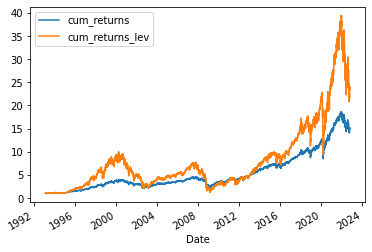

In [55]:
data.loc[:, ['cum_returns', 'cum_returns_lev']].plot();

In [ ]:
!pip install Nasdaq-Data-Link

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
